<h1><center>Author - Krishna Pawar</center></h1>

<h2>Task 5</h2>

# Exploratory Data Analysis - Sports(Indian Premier League)

### Problem Statement:
###### 1. Find out the most successful teams, players and factors contributing win or loss of a team.
###### 2. Suggest teams or players a company should endorse for its products.

### Dataset: https://bit.ly/34SRn3b

**Importing the necessary libraries**

In [175]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the first dataset (matches) and checking the head of it.**

In [176]:
matches = pd.read_csv(r"C:\Users\Administrator\OneDrive\Desktop\Example GRIP\Task 5\matches.csv")
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


**Reading the second dataset (deliveries) and checking the head of it.**

In [177]:
deliveries = pd.read_csv('C:\\Users\\Administrator\\OneDrive\\Desktop\\Example GRIP\\Task 5\\deliveries.csv')
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


<h2><center>******</center></h2>

## Data-Preprocessing of matches dataset

**Checking the size of the dataset**

In [178]:
matches.shape

(756, 18)

**Checking the columns of the dataset**

In [179]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

**Checking info of the dataset**

In [180]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

**Checking if there are any missing values in the dataset**

In [181]:
matches.isna().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

<h2><center>******</center></h2>

#### On checking missing values, we get:
###### 1. 7 missing values in city column
###### 2. 4 missing values in winner column
###### 3. 4 missing values in player_of_match column
###### 4. 2 missing values in umpire1 column
###### 5. 2 missing values in umpire2 column
###### 6. 637 missing values in umpire3 column

**On checking the missing values in the city column, it was found that all the matches where the value of city was missing were played in Dubai**

In [182]:
matches[matches['city'].isnull()][['city','date','venue']]

,city,date,venue
461,NaN,2014-04-19,Dubai International Cricket Stadium
462,NaN,2014-04-19,Dubai International Cricket Stadium
466,NaN,2014-04-23,Dubai International Cricket Stadium
468,NaN,2014-04-25,Dubai International Cricket Stadium
469,NaN,2014-04-25,Dubai International Cricket Stadium
474,NaN,2014-04-28,Dubai International Cricket Stadium
476,NaN,2014-04-30,Dubai International Cricket Stadium


**Checking list of unique values of city, it can be seen that there is nan value, i.e. the missing one**

In [183]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah', nan,
       'Mohali', 'Bengaluru'], dtype=object)

**Filling the missing values in the city column with Dubai**

In [184]:
matches['city'] = matches['city'].fillna('Dubai')

**Now on checking the unique values of city it can be found that nan value has been replaced by Dubai**

In [185]:
matches['city'].unique()

array(['Hyderabad', 'Pune', 'Rajkot', 'Indore', 'Bangalore', 'Mumbai',
       'Kolkata', 'Delhi', 'Chandigarh', 'Kanpur', 'Jaipur', 'Chennai',
       'Cape Town', 'Port Elizabeth', 'Durban', 'Centurion',
       'East London', 'Johannesburg', 'Kimberley', 'Bloemfontein',
       'Ahmedabad', 'Cuttack', 'Nagpur', 'Dharamsala', 'Kochi',
       'Visakhapatnam', 'Raipur', 'Ranchi', 'Abu Dhabi', 'Sharjah',
       'Dubai', 'Mohali', 'Bengaluru'], dtype=object)

**Checking the missing values in umpire1, umpire2 columns and the corresponding date of match and the teams involved as well as the season of the match**

In [186]:
matches[matches.umpire1.isnull()][['id','season','city','date','team1','team2','umpire1','umpire2']]

,id,season,city,date,team1,team2,umpire1,umpire2
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,NaN,NaN
753,11413,2019,Visakhapatnam,08/05/19,Sunrisers Hyderabad,Delhi Capitals,NaN,NaN


**On searching it was found that the umpire1 and umpire2 for the match between RCB and DD on 2017-04-08 were "S Ravi" and "VK Sharma" so the missing values are filled with the umpires**

In [187]:
matches.loc[matches['id']==5, 'umpire1']=matches.loc[matches['id']==5, 'umpire1'].fillna('S Ravi')
matches.loc[matches['id']==5, 'umpire2']=matches.loc[matches['id']==5, 'umpire2'].fillna('VK Sharma')

**On searching it was found that the umpire1 and umpire2 for the match between SRH and DC on 08/05/2019 were "Bruce Oxenford" and "S Ravi" so the missing values are filled with the umpires**

In [188]:
matches.loc[matches['id']==11413, 'umpire1']=matches.loc[matches['id']==11413, 'umpire1'].fillna('Bruce Oxenford')
matches.loc[matches['id']==11413, 'umpire2']=matches.loc[matches['id']==11413, 'umpire2'].fillna('S Ravi')

**Now again on checking the missing values for umpire, we don't find any because we have already filled them.**

In [189]:
matches[matches.umpire1.isnull()][['id','season','city','date','team1','team2','umpire1','umpire2']]

,id,season,city,date,team1,team2,umpire1,umpire2


**Since there are many missing values in umpire3 column which is nearly impossible to be filled up and hence we will drop column umpire3 as it of no use.**

In [190]:
matches = matches.drop('umpire3', axis=1)

**Now when we again check for the missing values we won't find any except 4 missing values in winner and player_of_match column due to no result.**

In [191]:
matches.isna().sum()

id                 0
season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             4
win_by_runs        0
win_by_wickets     0
player_of_match    4
venue              0
umpire1            0
umpire2            0
dtype: int64

<h2><center>******</center></h2>

**Now we will check for the different venues and their corresponding cities throughout different seasons. On checking it is found that many of the grounds are same but due to some difference in their spelling or way of writing or change in the name of the ground they are being treated as different.**

In [192]:
matches.groupby(['city','venue']).count()['season']

city            venue                                               
Abu Dhabi       Sheikh Zayed Stadium                                     7
Ahmedabad       Sardar Patel Stadium, Motera                            12
Bangalore       M Chinnaswamy Stadium                                   66
Bengaluru       M Chinnaswamy Stadium                                    7
                M. Chinnaswamy Stadium                                   7
Bloemfontein    OUTsurance Oval                                          2
Cape Town       Newlands                                                 7
Centurion       SuperSport Park                                         12
Chandigarh      Punjab Cricket Association IS Bindra Stadium, Mohali    11
                Punjab Cricket Association Stadium, Mohali              35
Chennai         M. A. Chidambaram Stadium                                8
                MA Chidambaram Stadium, Chepauk                         49
Cuttack         Barabati Stadiu

**All the grounds are modified to a single ground.**

In [193]:
matches['venue'].replace(to_replace='M. Chinnaswamy Stadium', value='M Chinnaswamy Stadium', inplace=True)
matches['venue'].replace(to_replace='Punjab Cricket Association IS Bindra Stadium, Mohali', value='Punjab Cricket Association Stadium, Mohali', inplace=True)
matches['venue'].replace(to_replace='M. A. Chidambaram Stadium', value='MA Chidambaram Stadium, Chepauk', inplace=True)
matches['venue'].replace(to_replace='Feroz Shah Kotla Ground', value='Feroz Shah Kotla', inplace=True)
matches['venue'].replace(to_replace='Rajiv Gandhi Intl. Cricket Stadium', value='Rajiv Gandhi International Stadium, Uppal', inplace=True)
matches['venue'].replace(to_replace='ACA-VDCA Stadium', value='Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', inplace=True)
matches['venue'].replace(to_replace='Subrata Roy Sahara Stadium', value='Maharashtra Cricket Association Stadium', inplace=True)

**Now again on checking the grounds we can see that Mohali and Chandigarh is pointing to the same ground i.e."Punjab Cricket Association Stadium, Mohali" so we will replace Chandigarh by Mohali and this is also the same case with Bangalore and Benngaluru.**

In [194]:
matches.groupby(['city','venue']).count()['season']

city            venue                                              
Abu Dhabi       Sheikh Zayed Stadium                                    7
Ahmedabad       Sardar Patel Stadium, Motera                           12
Bangalore       M Chinnaswamy Stadium                                  66
Bengaluru       M Chinnaswamy Stadium                                  14
Bloemfontein    OUTsurance Oval                                         2
Cape Town       Newlands                                                7
Centurion       SuperSport Park                                        12
Chandigarh      Punjab Cricket Association Stadium, Mohali             46
Chennai         MA Chidambaram Stadium, Chepauk                        57
Cuttack         Barabati Stadium                                        7
Delhi           Feroz Shah Kotla                                       74
Dharamsala      Himachal Pradesh Cricket Association Stadium            9
Dubai           Dubai International Cricket 

**Replacing Bangalore with Bengaluru and Chandigarh with Mohali**

In [195]:
matches['city'].replace(to_replace='Bangalore', value='Bengaluru', inplace=True)
matches['city'].replace(to_replace='Chandigarh', value='Mohali', inplace=True)

**Since both the stadiums at Mohali are same we will replace it with the newer name i.e."Punjab Cricket Association Stadium, Mohali"**

In [196]:
matches['venue'].replace(to_replace='IS Bindra Stadium', value='Punjab Cricket Association Stadium, Mohali', inplace=True)

**Again on checking, all the grounds are in perfect mannner**

In [197]:
matches.groupby(['city','venue']).count()['season']

city            venue                                              
Abu Dhabi       Sheikh Zayed Stadium                                    7
Ahmedabad       Sardar Patel Stadium, Motera                           12
Bengaluru       M Chinnaswamy Stadium                                  80
Bloemfontein    OUTsurance Oval                                         2
Cape Town       Newlands                                                7
Centurion       SuperSport Park                                        12
Chennai         MA Chidambaram Stadium, Chepauk                        57
Cuttack         Barabati Stadium                                        7
Delhi           Feroz Shah Kotla                                       74
Dharamsala      Himachal Pradesh Cricket Association Stadium            9
Dubai           Dubai International Cricket Stadium                     7
Durban          Kingsmead                                              15
East London     Buffalo Park                

<h2><center>******</center></h2>

**On checking the total wins it is seen that "Rising Pune Supergiants" are written two times due to spelling error.**

In [198]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Gujarat Lions                   13
Pune Warriors                   12
Rising Pune Supergiant          10
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Rising Pune Supergiants          5
Name: winner, dtype: int64

**Fixing the above problem.**

In [199]:
matches['winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants', inplace=True)

<h2><center>******</center></h2>

## Data-Preprocessing of deliveries dataset

**Checking the head of the second dataset.**

In [200]:
deliveries.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


**Checking the size of the deliveries dataset.**

In [201]:
deliveries.shape

(179078, 21)

**Checking info of the second dataset.**

In [202]:
deliveries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

**On checking the missing values in the second dataset. It is found that the last three columns contains a lot of missing values. It is justified as every delivery a batsman can't be dismissed so there will be missing values in player_dismissed column. Also if there is no dimissial then there will be missing values in dismissal_kind column too. fielder column also contains missing values because it is not necessary for a fielder to be involved in every dismissal.**

In [203]:
deliveries.isnull().sum()

match_id                 0
inning                   0
batting_team             0
bowling_team             0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
is_super_over            0
wide_runs                0
bye_runs                 0
legbye_runs              0
noball_runs              0
penalty_runs             0
batsman_runs             0
extra_runs               0
total_runs               0
player_dismissed    170244
dismissal_kind      170244
fielder             172630
dtype: int64

<h2><center>******</center></h2>

# Analysis of matches dataset

### Plotting for the number of matches in different cities

(array([  0.,  20.,  40.,  60.,  80., 100., 120.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

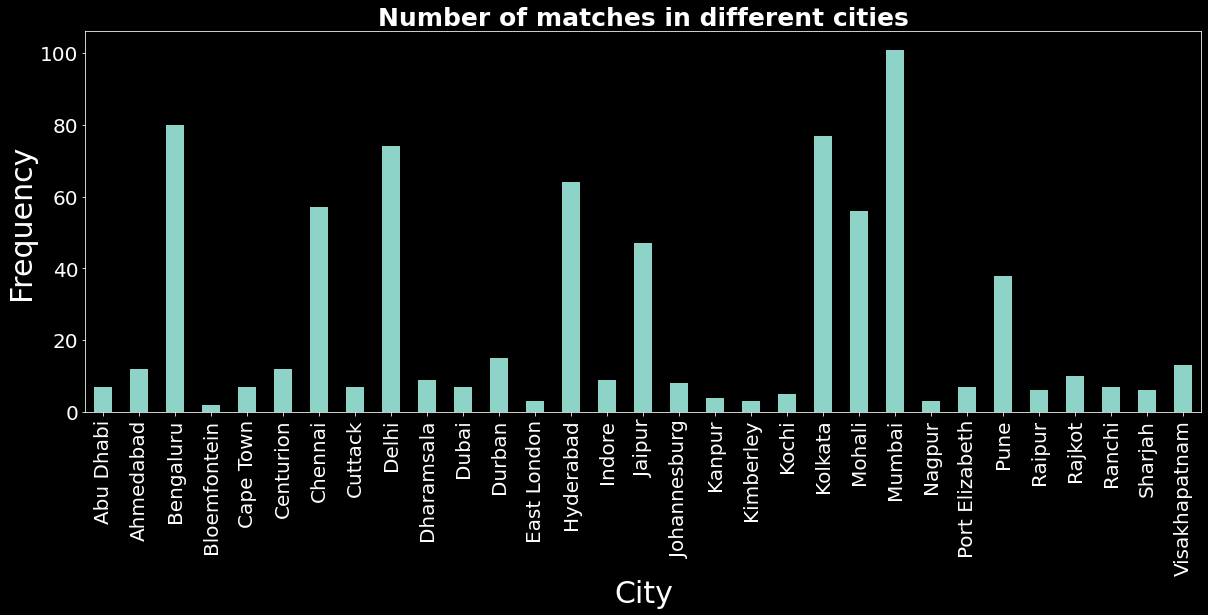

In [204]:
plt.style.use('dark_background')
plt.figure(figsize = (20,7))
matches.groupby(['city']).count()['season'].plot(kind='bar')
plt.title("Number of matches in different cities", fontsize = 25, fontweight = 'bold')
plt.xlabel("City", size = 30)
plt.ylabel("Frequency", size=30)
plt.xticks(size = 20)
plt.yticks(size = 20)

**From the above plot it can be seen that Mumbai has hosted the maximum number of matches, followed by Kolkata and Delhi.**

<h2><center>******</center></h2>

### Plotting for number of teams participating in each season

(array([ 0.,  2.,  4.,  6.,  8., 10., 12.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

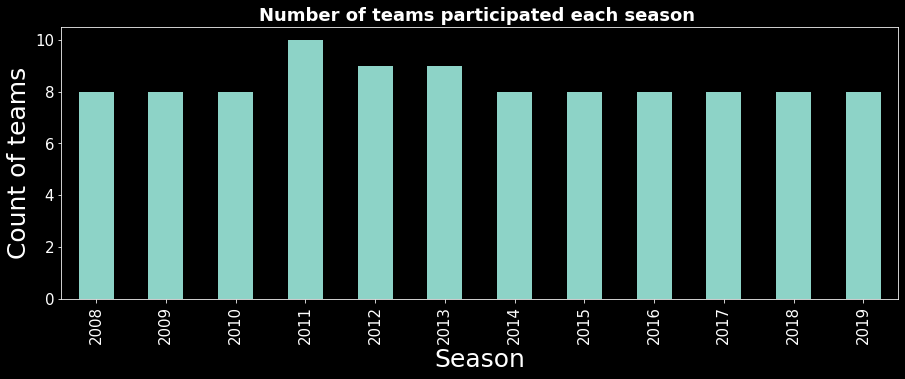

In [205]:
matches.groupby('season')['team1'].nunique().plot(kind = 'bar', figsize=(15,5))
plt.title("Number of teams participated each season ",fontsize=18,fontweight="bold")
plt.ylabel("Count of teams", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 15)
plt.yticks(size = 15)

**From the above plot it can be concluded that in the year 2011 most number of teams i.e. 10 teams played the tournament.**

<h2><center>******</center></h2>

### Plotting for number of matches played every season

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

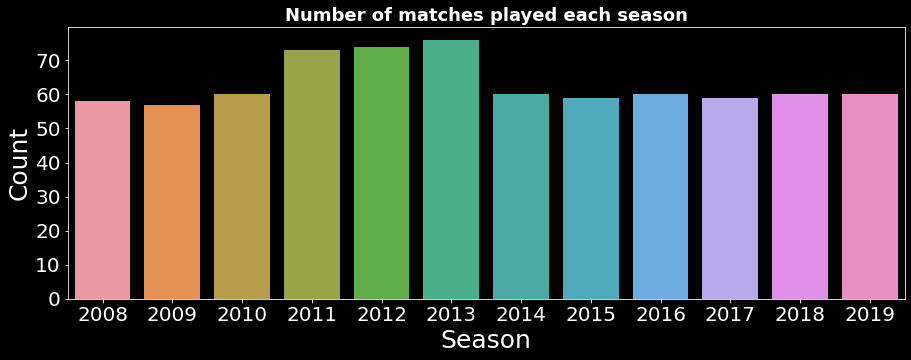

In [206]:
plt.figure(figsize=(15,5))
sns.countplot(x='season', data = matches)
plt.title("Number of matches played each season",fontsize=18,fontweight="bold")
plt.ylabel("Count", size = 25)
plt.xlabel("Season", size = 25)
plt.xticks(size = 20)
plt.yticks(size = 20)

**The above plot shows that most number of matches were played in the season 2013**

<h2><center>******</center></h2>

### Plot to check the venue hosting most number of matches

Text(0.5, 0, 'Frequency')

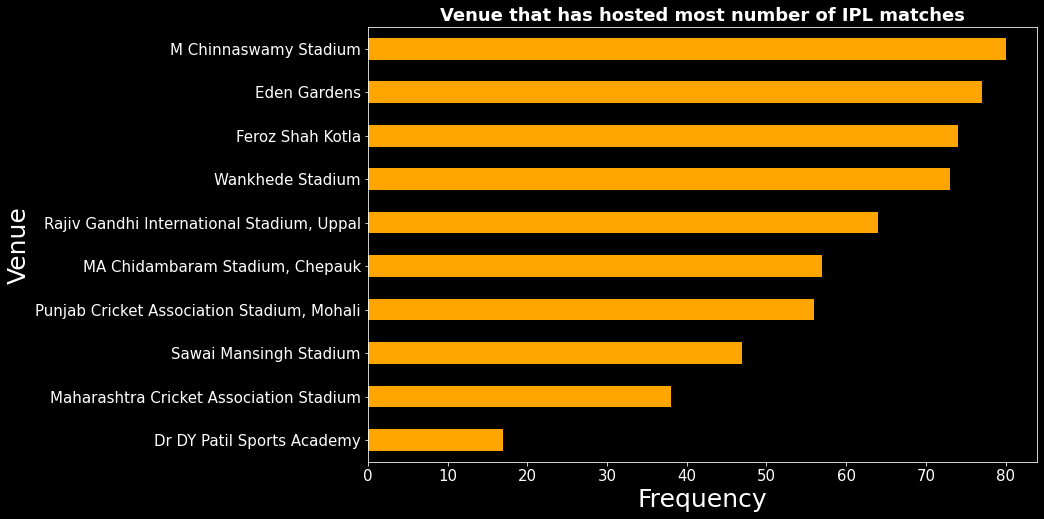

In [207]:
matches.venue.value_counts().sort_values(ascending = True).tail(10).plot(kind = 'barh',figsize=(12,8), fontsize=15, color='orange')
plt.title("Venue that has hosted most number of IPL matches",fontsize=18,fontweight="bold")
plt.ylabel("Venue", size = 25)
plt.xlabel("Frequency", size = 25)

**From the plot, it is clear that both "Eden Gardens" and "M Chinnaswamy Stadium" have hosted equal and most number of matches.**

<h2><center>******</center></h2>

### Total number of teams that participated in IPL so far.

In [208]:
len(matches['winner'].value_counts())

14

**There are 14 teams that have participated in IPL so far**

<h2><center>******</center></h2>

### Teams with most number of wins

In [209]:
teams = matches['winner'].value_counts()
teams

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Rajasthan Royals                75
Delhi Daredevils                67
Sunrisers Hyderabad             58
Deccan Chargers                 29
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Delhi Capitals                  10
Kochi Tuskers Kerala             6
Name: winner, dtype: int64

### Plotting the teams with most number of wins

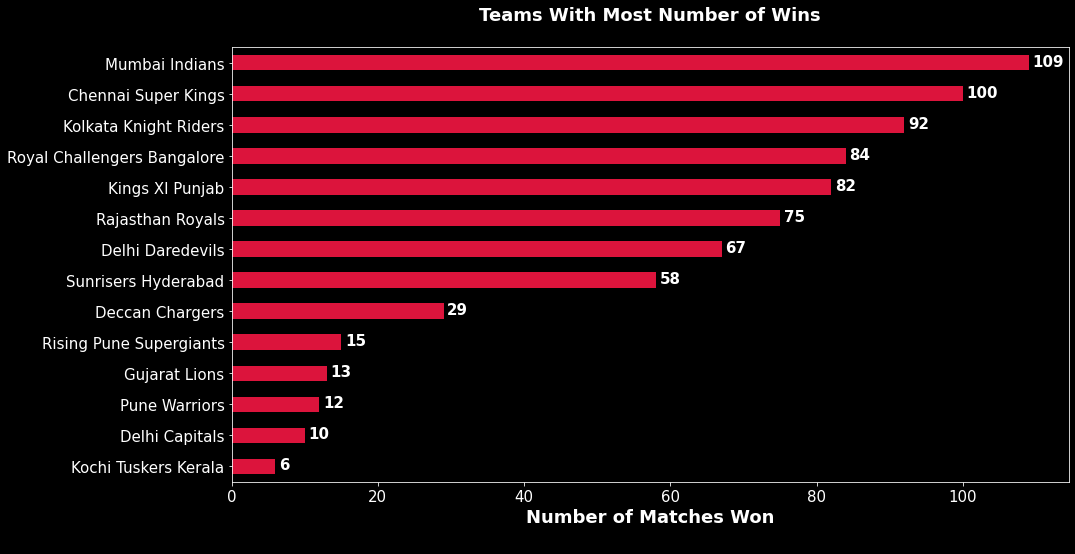

In [210]:
teams = teams.plot.barh(figsize=(15,8), color='crimson', fontsize=15)


teams.set_title('Teams With Most Number of Wins\n', fontsize=18,fontweight = 'bold')
teams.set_xlabel('Number of Matches Won\n', fontsize=18, fontweight = 'bold')
teams.invert_yaxis()

for i in teams.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    teams.text(i.get_width()+0.5, i.get_y()+0.35, i.get_width(),fontsize=15, fontweight = 'bold', color='white')

**Mumbai Indians have won the maximum number of matches(109) followed by Chennai Super Kings(100)**

<h2><center>******</center></h2>

## Match Info when Teams Won by Maximum Runs and Wickets

### Maximum Runs

In [211]:
matches['win_by_runs'].max()

146

**146 runs was the maximum margin of victory.**

### Match Info when the game was won by maximum runs

In [212]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
Name: 43, dtype: object

**It can be seen that the match was played between Mumbai Indians and Delhi Daredevils at Feroz Shah Kotla in Delhi on 2017-05-06 where Mumbai Indians won the game by 146 runs and the player of the match was LMP Simmons**

### Maximum Wickets

In [213]:
matches['win_by_wickets'].max()

10

**10 wickets win was the maximum win by wickets**

### Match Info when the Game was Won by Maximum Wickets

In [214]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
Name: 2, dtype

**This game was played between Gujarat Lions and Kolkata Knight Riders at Saurashtra Cricket Association Stadium in Rajkot on 2017-04-07 where Kolkata won by 10 wickets and the player of the match was CA Lynn**

### Checking if there are more matches where teams won by 10 wickets

In [215]:
more_matches_won_by_10_wickets = matches[matches.win_by_wickets==10]
more_matches_won_by_10_wickets

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Mohali,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association Stadium, Mohali",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bengaluru,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Mohali,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


### Number of times an individual team had won by 10 wickets

In [216]:
more_matches_won_by_10_wickets['winner'].value_counts()

Royal Challengers Bangalore    3
Deccan Chargers                1
Kolkata Knight Riders          1
Kings XI Punjab                1
Mumbai Indians                 1
Rajasthan Royals               1
Sunrisers Hyderabad            1
Chennai Super Kings            1
Delhi Daredevils               1
Name: winner, dtype: int64

**Royal Challengers Bangalore have won for the most number of times by 10 wickets.**

### Total number of times when the game has been won by 10 wickets

In [217]:
more_matches_won_by_10_wickets['winner'].value_counts().sum()

11

**There were 11 matches where the teams have won the game by 10 wickets**

<h2><center>******</center></h2>

## Teams with Most IPL Titles

In [218]:
#Creating a new dataframe
winners = matches[['season','winner']]

In [219]:
#Creating a empty dict for storing team name with most number of title
team_with_most_title = {}
for i in sorted(winners.season.unique()):
    team_with_most_title[i] = winners[winners.season == i]['winner'].tail(1).values[0]
     
season_winner = pd.Series(team_with_most_title)
#creating the final dataframe
season_winner = pd.DataFrame(season_winner, columns=['Season_Winner'])

#### Displaying year wise winners

In [220]:
season_winner

,Season_Winner
2008,Rajasthan Royals
2009,Deccan Chargers
2010,Chennai Super Kings
2011,Chennai Super Kings
2012,Kolkata Knight Riders
2013,Mumbai Indians
2014,Kolkata Knight Riders
2015,Mumbai Indians
2016,Sunrisers Hyderabad
2017,Mumbai Indians


### Plotting the teams with most number of titles

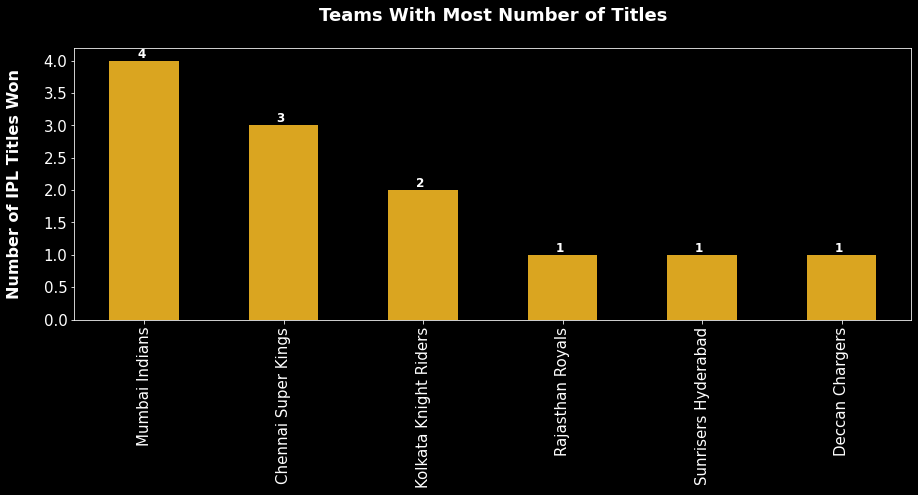

In [221]:
season_winner= season_winner['Season_Winner'].value_counts().plot(kind ='bar',figsize=(15,5), color='goldenrod', fontsize=15)
plt.style.use('dark_background')

season_winner.set_title('Teams With Most Number of Titles\n', fontsize=18,fontweight = 'bold')

season_winner.set_ylabel('Number of IPL Titles Won\n', fontsize=16, fontweight = 'bold')


for i in season_winner.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    season_winner.text(i.get_x()+.20, i.get_height()+.05, i.get_height(),fontsize=12,fontweight='bold', color='white')

**Mumbai Indians are the most successfull team with 4 titles followed by Chennai Super Kings(3 titles) and Kolkata Knight Riders(3 titles)**

<h2><center>******</center></h2>

## Toss Impact On Team Wins:

In [222]:
most_toss_win = matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Rising Pune Supergiants         7
Rising Pune Supergiant          6
Name: toss_winner, dtype: int64

**Rising Pune Supergiants appeared twice due to spelling mistake.**

**Fixing the above problem**

In [223]:
matches['toss_winner'].replace(to_replace='Rising Pune Supergiant', value='Rising Pune Supergiants', inplace=True)

### Again, checking the teams with most number of toss wins

In [224]:
most_toss_win = matches['toss_winner'].value_counts()
most_toss_win

Mumbai Indians                 98
Kolkata Knight Riders          92
Chennai Super Kings            89
Kings XI Punjab                81
Royal Challengers Bangalore    81
Rajasthan Royals               80
Delhi Daredevils               80
Sunrisers Hyderabad            46
Deccan Chargers                43
Pune Warriors                  20
Gujarat Lions                  15
Rising Pune Supergiants        13
Delhi Capitals                 10
Kochi Tuskers Kerala            8
Name: toss_winner, dtype: int64

**Mumbai Indians have won the toss for the maximum number of times.**

### Plotting the teams with maximum number of Toss wins

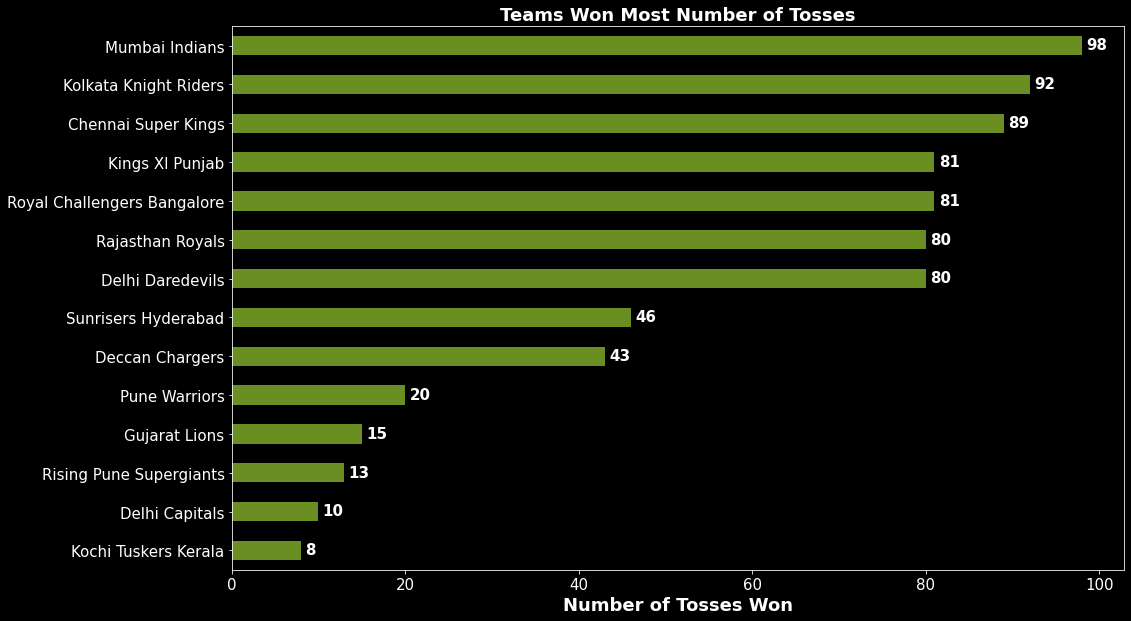

In [225]:
most_toss_win = most_toss_win.plot.barh(figsize=(16,10), color='olivedrab', fontsize=15)
plt.style.use('dark_background')

most_toss_win.set_title('Teams Won Most Number of Tosses', fontsize=18,fontweight = 'bold')

most_toss_win.set_xlabel('Number of Tosses Won', fontsize=18, fontweight = 'bold')

most_toss_win.invert_yaxis()

for i in most_toss_win.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    most_toss_win.text(i.get_width()+0.5, i.get_y()+.35, i.get_width(),fontsize=15, fontweight = 'bold', color='white')

**We can infer from this the winning the toss impacts on match winner as top 3 most successful teams(Mumbai Indians,Kolkata Knight Riders & Chennai Super Kings) of IPL also won most number of tosses**

<h2><center>******</center></h2>

## Toss Decision by Teams:

In [226]:
toss_decision = matches['toss_decision'].value_counts()
toss_decision

field    463
bat      293
Name: toss_decision, dtype: int64

### Plotting the dicision of toss by teams

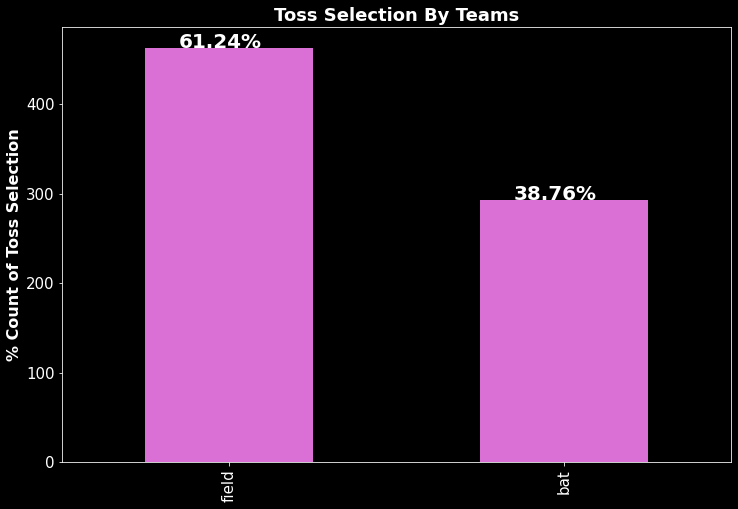

In [227]:
toss_decision = toss_decision.plot(kind ='bar',figsize=(12,8), color='orchid', fontsize=15)
plt.style.use('dark_background')

toss_decision.set_title('Toss Selection By Teams', fontsize=18,fontweight = 'bold')

toss_decision.set_ylabel('% Count of Toss Selection', fontsize=16, fontweight = 'bold')

totals = []

# find the values and append to list
for i in toss_decision.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

for i in toss_decision.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    toss_decision.text(i.get_x()+.10, i.get_height()+.01,
                  str(round((i.get_height()/total)*100,2))+'%',
                  fontsize=20,fontweight='bold', color='white')

**From the above analysis, we can say that Most of the teams preferred to field first when they Won the Toss.**

## Teams Winning Batting First/Second

### Batting First

In [228]:
most_wins_batting_first = matches.winner[matches.win_by_runs!=0].value_counts()
most_wins_batting_first

Mumbai Indians                 57
Chennai Super Kings            52
Kings XI Punjab                38
Kolkata Knight Riders          36
Royal Challengers Bangalore    35
Sunrisers Hyderabad            30
Rajasthan Royals               27
Delhi Daredevils               25
Deccan Chargers                18
Rising Pune Supergiants         7
Pune Warriors                   6
Delhi Capitals                  3
Kochi Tuskers Kerala            2
Gujarat Lions                   1
Name: winner, dtype: int64

### Plotting teams with Maximum Wins while Batting First

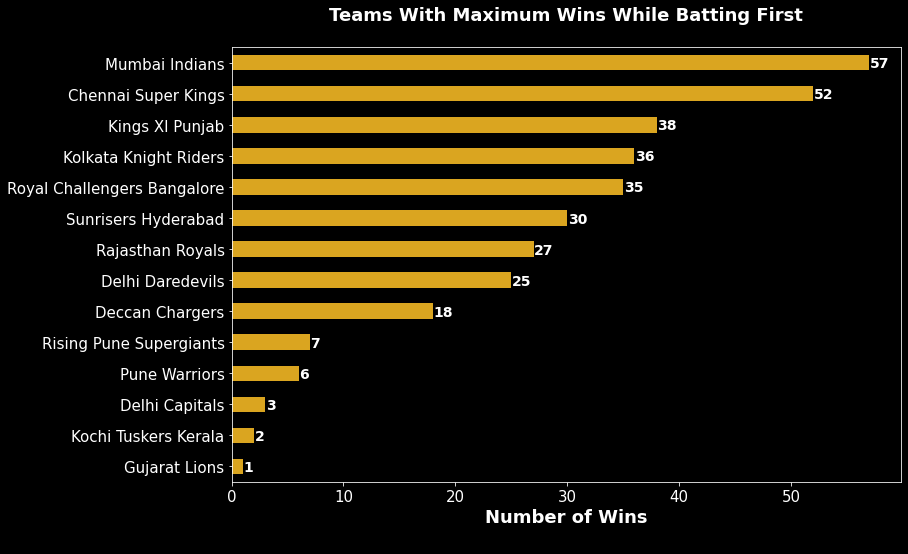

In [229]:
most_wins_batting_first = most_wins_batting_first.plot(kind ='barh',figsize=(12,8), color='goldenrod', fontsize=15)
plt.style.use('dark_background')

most_wins_batting_first.set_title('Teams With Maximum Wins While Batting First\n', fontsize=18,fontweight = 'bold')

most_wins_batting_first.set_xlabel('Number of Wins\n', fontsize=18, fontweight = 'bold')

most_wins_batting_first.invert_yaxis()

for i in most_wins_batting_first.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    most_wins_batting_first.text(i.get_width()+.05, i.get_y()+.40,
                                 i.get_width(),fontsize=14, 
                                 fontweight = 'bold', color='white')

**We can see that Mumbai Indians registered most wins while batting first as compared to other teams. So, from this analysis we can also say that Mumbai Indians is the best team while defending the target followed by Chennai Super Kings**

### Batting Second

In [230]:
most_wins_batting_second = matches.winner[matches.win_by_wickets!=0].value_counts()
most_wins_batting_second

Kolkata Knight Riders          56
Mumbai Indians                 50
Chennai Super Kings            48
Royal Challengers Bangalore    48
Rajasthan Royals               46
Kings XI Punjab                42
Delhi Daredevils               42
Sunrisers Hyderabad            27
Gujarat Lions                  12
Deccan Chargers                11
Rising Pune Supergiants         8
Pune Warriors                   6
Delhi Capitals                  6
Kochi Tuskers Kerala            4
Name: winner, dtype: int64

### Plotting teams with Maximum Wins while Batting Second

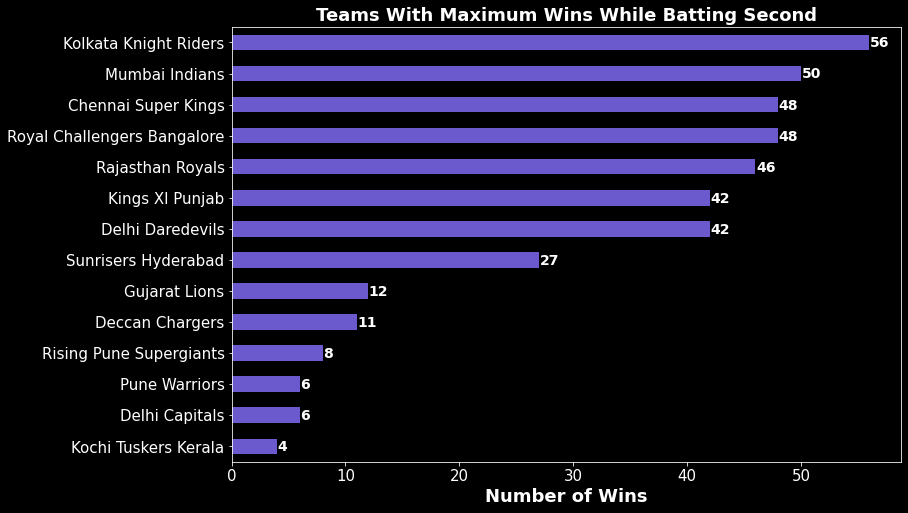

In [231]:
most_wins_batting_second = most_wins_batting_second.plot(kind ='barh',figsize=(12,8), color='slateblue', fontsize=15)
plt.style.use('dark_background')

most_wins_batting_second.set_title('Teams With Maximum Wins While Batting Second', fontsize=18,fontweight = 'bold')

most_wins_batting_second.set_xlabel('Number of Wins', fontsize=18, fontweight = 'bold')

most_wins_batting_second.invert_yaxis()

for i in most_wins_batting_second.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    most_wins_batting_second.text(i.get_width()+.05, i.get_y()+.40,
                                  i.get_width(),fontsize=14,
                                  fontweight = 'bold', color='white')

**We can see that Kolkata Knight Riders registered most wins while batting second as compared to other teams. So, from this analysis we can also say that Kolkata Knight Riders is the best team while chasing the target followed by Mumbai Indians.**

<h2><center>******</center></h2>

### Most Palyer of the Match Awards

In [232]:
most_player_of_match = matches['player_of_match'].value_counts()[0:10]
most_player_of_match

CH Gayle          21
AB de Villiers    20
DA Warner         17
MS Dhoni          17
RG Sharma         17
YK Pathan         16
SR Watson         15
SK Raina          14
G Gambhir         13
V Kohli           12
Name: player_of_match, dtype: int64

### Plotting the players with most number of man of the match awards

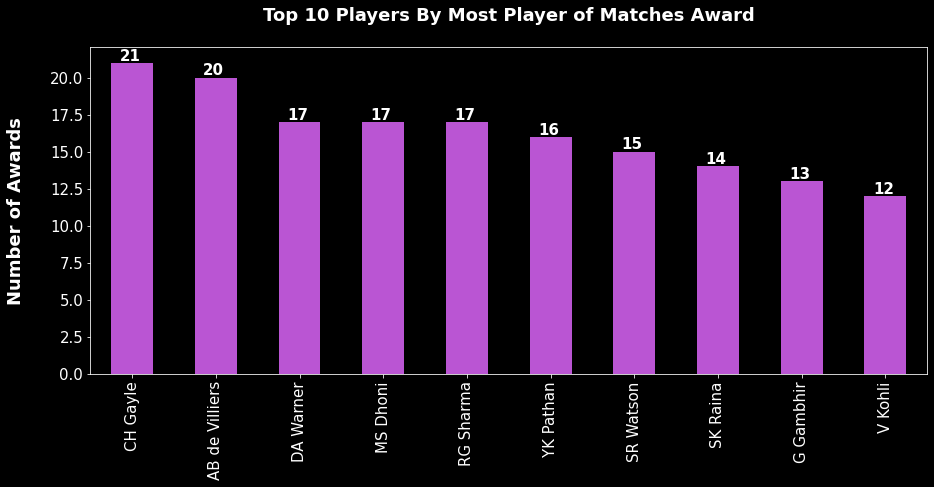

In [233]:
most_player_of_match = most_player_of_match.plot(kind ='bar',figsize=(15,6), color='mediumorchid', fontsize=15)
plt.style.use('dark_background')
most_player_of_match.set_title('Top 10 Players By Most Player of Matches Award\n', fontsize=18,fontweight = 'bold')

most_player_of_match.set_ylabel('Number of Awards\n', fontsize=18, fontweight = 'bold')

for i in most_player_of_match.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    most_player_of_match.text(i.get_x()+.10, i.get_height()+.2, i.get_height(),fontsize=15,fontweight='bold', color='white')

**We can see that CH Gayle got awarded with player of match the most (21 Times) followed By AB de Villiers(20 Times) and from this analysis we can infer that CH Gayle is the most valuable player to his team followed by AB de Villiers.**

<h2><center>******</center></h2>

## Match Result:

In [234]:
match_result = matches['result'].value_counts()
match_result

normal       743
tie            9
no result      4
Name: result, dtype: int64

### Plotting result of the match

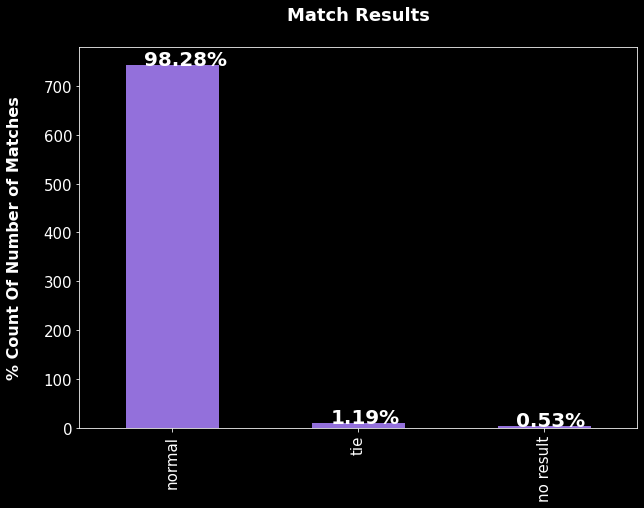

In [235]:
match_result = match_result.plot(kind ='bar',figsize=(10,7), color='mediumpurple', fontsize=15)
plt.style.use('dark_background')

match_result.set_title('Match Results\n', fontsize=18,fontweight = 'bold')

match_result.set_ylabel('% Count Of Number of Matches\n', fontsize=16, fontweight = 'bold')

totals = []

# finding the values to append to the list
for i in match_result.patches:
    totals.append(i.get_height())

# for individual bar labels size using above list
total = sum(totals)

for i in match_result.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    match_result.text(i.get_x()+.10, i.get_height()+.01,
                  str(round((i.get_height()/total)*100,2))+'%',
                  fontsize=20,fontweight='bold', color='white')

**From this we can infer that there were only 4 Matches in the history IPL with No Result**

<h2><center>******</center></h2>

## DL-Rule:

In [236]:
dl_rule = matches['dl_applied'].value_counts()
dl_rule

0    737
1     19
Name: dl_applied, dtype: int64

**Replacing '1'  to 'Applied' and  '0'  to 'Not Applied' For Better Analysis**

In [237]:
dl_rule  = matches['dl_applied'].replace(to_replace=1, value='Applied', inplace=True)
dl_rule  = matches['dl_applied'].replace(to_replace=0, value='Not Applied', inplace=True)

In [238]:
dl_rule = matches['dl_applied'].value_counts()
dl_rule

Not Applied    737
Applied         19
Name: dl_applied, dtype: int64

### Plotting DL-Rule

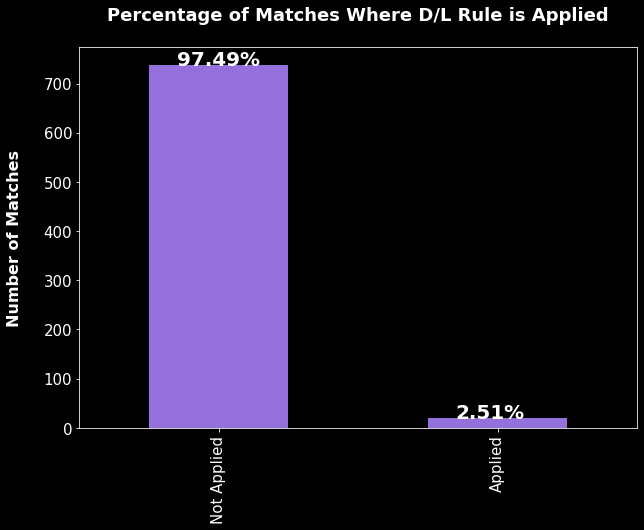

In [239]:
dl_rule = dl_rule.plot(kind ='bar',figsize=(10,7), color='mediumpurple', fontsize=15)
plt.style.use('dark_background')

dl_rule.set_title('Percentage of Matches Where D/L Rule is Applied\n', fontsize=18,fontweight = 'bold')

dl_rule.set_ylabel('Number of Matches\n', fontsize=16, fontweight = 'bold')

totals = []

# finding the values to append to the list
for i in dl_rule.patches:
    totals.append(i.get_height())

# for individual bar labels size using above list
total = sum(totals)

for i in dl_rule.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    dl_rule.text(i.get_x()+.10, i.get_height()+.01,
                  str(round((i.get_height()/total)*100,2))+'%',
                  fontsize=20,fontweight='bold', color='white')

**2.51% Times D/L Rule(when the number of overs were reduced due to rain) are Applied in the IPL Matches**

<h2><center>******</center></h2>

## Close Matches:

## 1 Run Win/Loss and 1 Wicket Win/Loss

### By 1 Run

In [240]:
close_matches_by1run = matches.win_by_runs[matches.win_by_runs==1].value_counts()
close_matches_by1run

1    10
Name: win_by_runs, dtype: int64

**We can see there are 10 Matches that have ended with Win/Loss by 1 Run
<br>
<br>
Let's see the Breakdown of those Matches with the Teams that were involved in those Matches**

In [241]:
close_matches_by1run = matches.winner[matches.win_by_runs==1].value_counts()
close_matches_by1run

Mumbai Indians                 3
Royal Challengers Bangalore    2
Kings XI Punjab                2
Delhi Daredevils               1
Chennai Super Kings            1
Gujarat Lions                  1
Name: winner, dtype: int64

**We can see that Mumbai Indians are part of these matches the most(3 Times) followed By Royal Challengers Bangalore(2 Times)**

### By 1 Wicket

In [242]:
close_matches_by1wickets = matches.win_by_wickets[matches.win_by_wickets==1].value_counts()
close_matches_by1wickets

1    3
Name: win_by_wickets, dtype: int64

**We can see there are 3 Matches that have ended with Win/Loss by 1 Wicket
<br>
<br>
Let's see the Breakdown of those Matches with the Teams that were involved in those Matches**

In [243]:
close_matches_bywickets = matches.winner[matches.win_by_wickets==1].value_counts()
close_matches_bywickets

Sunrisers Hyderabad      1
Kolkata Knight Riders    1
Chennai Super Kings      1
Name: winner, dtype: int64

**All the above shown teams are part of the matches won/loss by 1 wicket**

<h2><center>******</center></h2>

## Analysis of Matches Dataset - Key Insights:

- Mumbai is the city that has hosted maximum number of matches.

- In 2011 the maximum number of teams(10 teams) played in the tournament and in 2013 maximum number of matches(76 matches) were played in a season.

- M Chinnaswamy Stadium has hosted the maximum number of matches followed by Eden Gardens.

- Total 14 Teams Participated in IPL Over 11 Years(2008-2019) out of which only 6 Teams Managed to Win the IPL Title.

- Mumbai Indians is the Most Successful Team in the IPL History (with Most Number of IPL Titles(4) and Most Number of Match Wins(109) followed by Chennai Super Kings ( With 3 IPL Titles and Second Most Wins in IPL(100) and Kolkata Knight Riders(With 2 IPL Titles and Third Most Number of Wins(92).

- From The Toss Analysis we can infer that the Top 3 Most Successful Teams also Won Maximum Number of Tosses and the Teams who Won the Toss Preffered to Field First 61.2% Times.

- Mumbai Indians is the Most Successful Team while Defending the Target and Kolkata Knight Riders is the Most Successful Team while Chasing The Target.

- CH Gayle is the Most Valuable Player to his team with Most number of Man of the Match Awards(21).

- D/L-Rule is applied to 2.51% of the total matches.  

<h2><center>--*--*--*--*--</center></h2>

# Analysis of deliveries dataset

## Batsmans/Bowlers Analysis 

**No. of Players who have faced atleast one ball in the IPL so far**

In [244]:
batters = len(deliveries['batsman'].unique())
print(f'Total Number of Players who have faced at least one ball in the IPL so far: {batters}')

Total Number of Players who have faced at least one ball in the IPL so far: 516


**No. of Players who have bowl atleast one ball in the IPL so far**

In [245]:
bowlers = len(deliveries['bowler'].unique())
print(f'Total Number of Players who have bowl at least one ball in the IPL so far: {bowlers}')

Total Number of Players who have bowl at least one ball in the IPL so far: 405


<h2><center>******</center></h2>

## Most deliveries played by Batsman

In [246]:
played_most_deliveries = deliveries['batsman'].value_counts()[0:10]
played_most_deliveries

V Kohli       4211
SK Raina      4044
RG Sharma     3816
S Dhawan      3776
G Gambhir     3524
RV Uthappa    3492
DA Warner     3398
MS Dhoni      3318
AM Rahane     3215
CH Gayle      3131
Name: batsman, dtype: int64

### Plotting deliveries played by Batsman

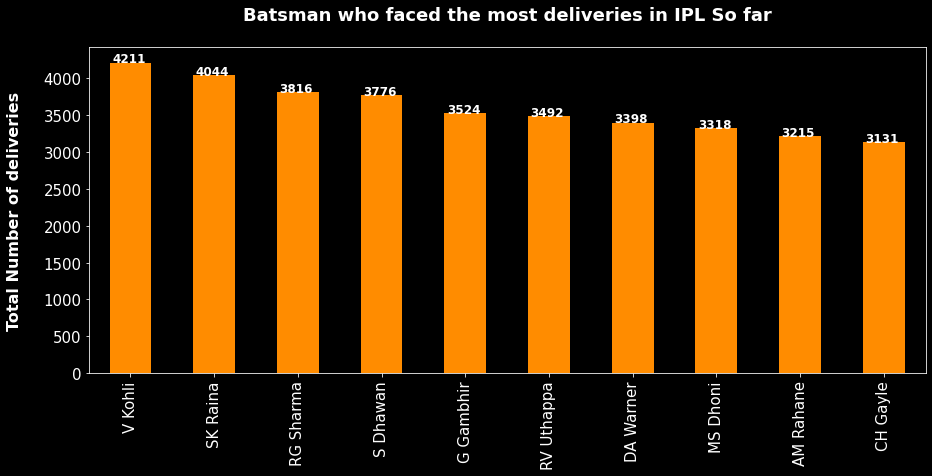

In [247]:
played_most_deliveries = played_most_deliveries.plot(kind ='bar',figsize=(15,6), color='darkorange', fontsize=15)
plt.style.use('dark_background')

played_most_deliveries.set_title('Batsman who faced the most deliveries in IPL So far\n', fontsize=18,fontweight = 'bold')

played_most_deliveries.set_ylabel('Total Number of deliveries\n', fontsize=16, fontweight = 'bold')



for i in played_most_deliveries.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    played_most_deliveries.text(i.get_x()+.03,i.get_height()+.60,i.get_height(),fontsize=12,fontweight='bold',color='white')

**Virat Kohli has faced most number of deliveries in the IPL so far**

<h2><center>******</center></h2>

## Bowlers with Most Deliveries

In [248]:
bowl_most_deliveries = deliveries['bowler'].value_counts()[0:10]
bowl_most_deliveries

Harbhajan Singh    3451
A Mishra           3172
PP Chawla          3157
R Ashwin           3016
SL Malinga         2974
DJ Bravo           2711
B Kumar            2707
P Kumar            2637
UT Yadav           2605
SP Narine          2600
Name: bowler, dtype: int64

### Plotting bowlers with Most Deliveries

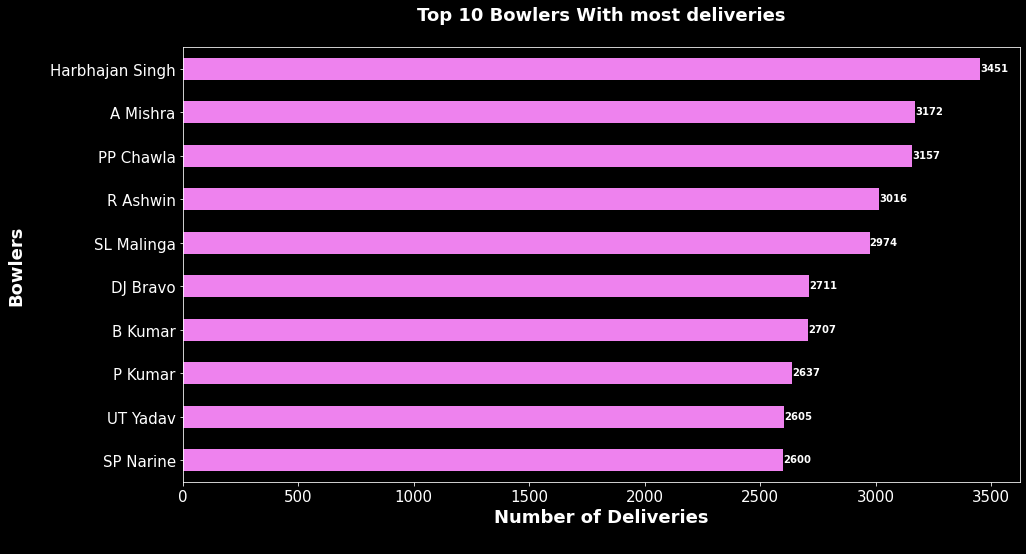

In [249]:
bowl_most_deliveries = bowl_most_deliveries.plot(kind ='barh',figsize=(15,8), color='violet', fontsize=15)
plt.style.use('dark_background')
bowl_most_deliveries.set_title('Top 10 Bowlers With most deliveries\n', fontsize=18,fontweight = 'bold')

bowl_most_deliveries.set_xlabel('Number of Deliveries\n', fontsize=18, fontweight = 'bold')
bowl_most_deliveries.set_ylabel('Bowlers\n', fontsize=18, fontweight = 'bold')

bowl_most_deliveries.invert_yaxis()

for i in bowl_most_deliveries.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    bowl_most_deliveries.text(i.get_width()+.05, i.get_y()+.30, i.get_width(),fontsize=10, fontweight = 'bold', color='white')

**Harbhajan Singh has bowled the maximum number of deliveries in the history of IPL**

<h2><center>******</center></h2>

## Top 15 Players with Most Runs in IPL History.

In [250]:
top15_run_getter = deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending = False)[0:15]
top15_run_getter

batsman
V Kohli           5434
SK Raina          5415
RG Sharma         4914
DA Warner         4741
S Dhawan          4632
CH Gayle          4560
MS Dhoni          4477
RV Uthappa        4446
AB de Villiers    4428
G Gambhir         4223
AM Rahane         3850
KD Karthik        3688
SR Watson         3614
AT Rayudu         3326
YK Pathan         3241
Name: batsman_runs, dtype: int64

### Plotting Players with Most Runs

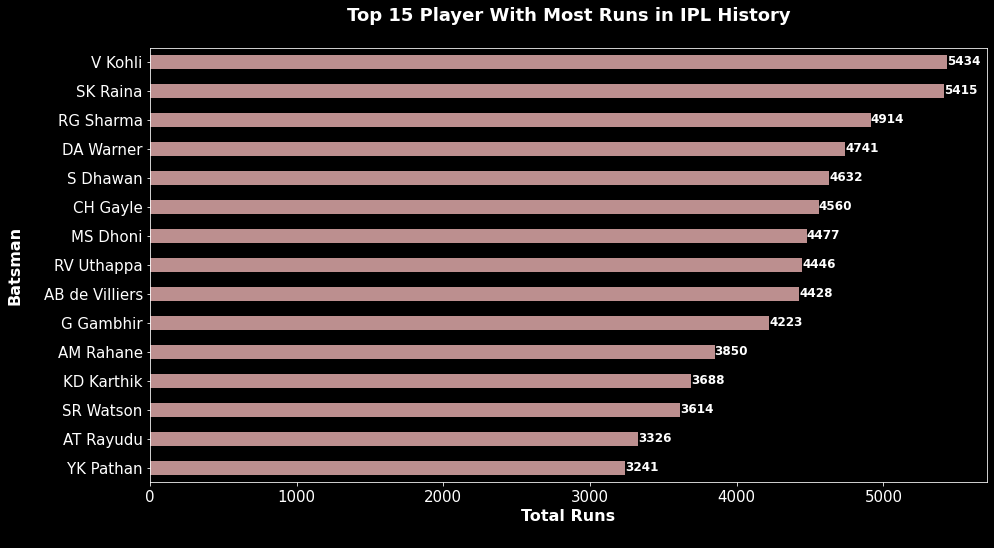

In [251]:
top15_run_getter = top15_run_getter.plot(kind ='barh',figsize=(15,8), color='rosybrown', fontsize=15)
plt.style.use('dark_background')

top15_run_getter.set_title('Top 15 Player With Most Runs in IPL History\n', fontsize=18,fontweight = 'bold')

top15_run_getter.set_xlabel('Total Runs\n', fontsize=16, fontweight = 'bold')
top15_run_getter.set_ylabel('Batsman\n', fontsize=16, fontweight = 'bold')

top15_run_getter.invert_yaxis()

for i in top15_run_getter.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    top15_run_getter.text(i.get_width()+0.5, i.get_y()+.35, i.get_width(),fontsize=12, fontweight = 'bold', color='white')

**Virat Kohli is the Top Run Scorer with 5434 runs, followed by Suresh Raina 5415 runs and then Rohit Sharma 4914 runs**

<h2><center>******</center></h2>

## Comparision of Top 3 Run Scorers of IPL per season

### 1. Virat Kohli
### 2. Suresh Raina
### 3. Rohit Sharma

#### For this comparison two datasets need to be merged

In [252]:
df = pd.merge(matches, deliveries, left_on = 'id', right_on = 'match_id')

**Virat Kohli runs per season**

In [253]:
vkohli = df[df['batsman'] == 'V Kohli']
vkohli = vkohli.groupby('season')['batsman_runs'].sum()
vkohli

season
2008    165
2009    246
2010    307
2011    557
2012    364
2013    639
2014    359
2015    505
2016    973
2017    308
2018    539
2019    472
Name: batsman_runs, dtype: int64

**Suresh Raina runs per season**

In [254]:
sraina = df[df['batsman'] == 'SK Raina']
sraina = sraina.groupby('season')['batsman_runs'].sum()
sraina

season
2008    421
2009    434
2010    528
2011    438
2012    441
2013    548
2014    523
2015    374
2016    399
2017    442
2018    466
2019    401
Name: batsman_runs, dtype: int64

**Rohit Sharma runs per season**

In [255]:
rsharma = df[df['batsman'] == 'RG Sharma']
rsharma = rsharma.groupby('season')['batsman_runs'].sum()
rsharma

season
2008    404
2009    362
2010    404
2011    372
2012    433
2013    538
2014    390
2015    482
2016    489
2017    333
2018    297
2019    410
Name: batsman_runs, dtype: int64

### Plotting the Line Chart to compare their performance by runs per season :

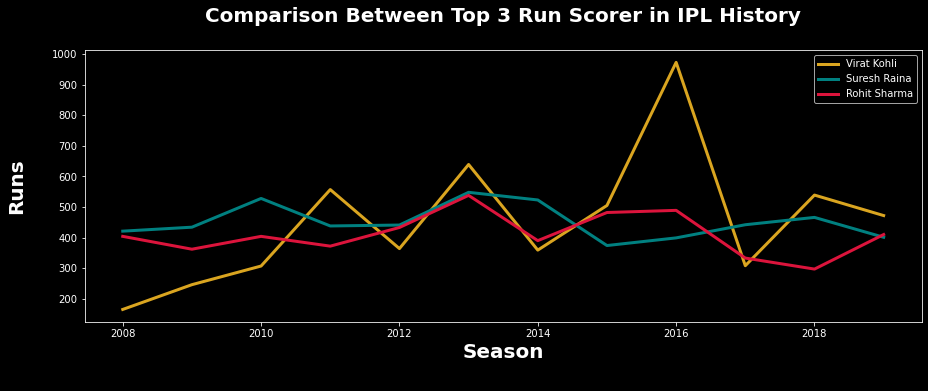

In [256]:
vkohli.plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'goldenrod', label = 'Virat Kohli')
sraina.plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'teal', label = 'Suresh Raina')
rsharma.plot(kind = 'line', linewidth = 3, figsize =(15,5),color = 'crimson', label = 'Rohit Sharma')
plt.style.use('dark_background')
    
plt.title("Comparison Between Top 3 Run Scorer in IPL History\n",fontsize= 20, fontweight = 'bold')
plt.xlabel('Season\n',fontsize= 20, fontweight = 'bold')
plt.ylabel('Runs\n',fontsize= 20, fontweight = 'bold')
 
plt.legend()
plt.show()

**From the above graph we can say that**<br>
**(a) Suresh Raina is the Most Consistent Player in the IPL History.**<br>
**(b) Rohit Sharma is also consistent but not as consistent as Suresh Raina.**<br>
**(c) Virat Kohli didn't started his career well in IPL. We can see there are sharp Rise & Decline of Runs Trend in Alternate Seasons and we can see a Shape Rise in Virat Kohli Runs in 2016 Season that means his Most Successful Season was 2016 where he performed exceptionally well. Also Virat Kohli is least consistent among the three players**

<h2><center>******</center></h2>

## Top 15 Players with Most Wickets in IPL History

In [257]:
top15_wicket_takers = deliveries.groupby('bowler')['player_dismissed'].count().sort_values(ascending = False)[0:15]
top15_wicket_takers

bowler
SL Malinga         188
DJ Bravo           168
A Mishra           165
Harbhajan Singh    161
PP Chawla          156
B Kumar            141
R Ashwin           138
SP Narine          137
UT Yadav           136
R Vinay Kumar      127
A Nehra            121
Z Khan             119
RA Jadeja          116
SR Watson          107
DW Steyn           104
Name: player_dismissed, dtype: int64

### Plotting players with most number of wickets

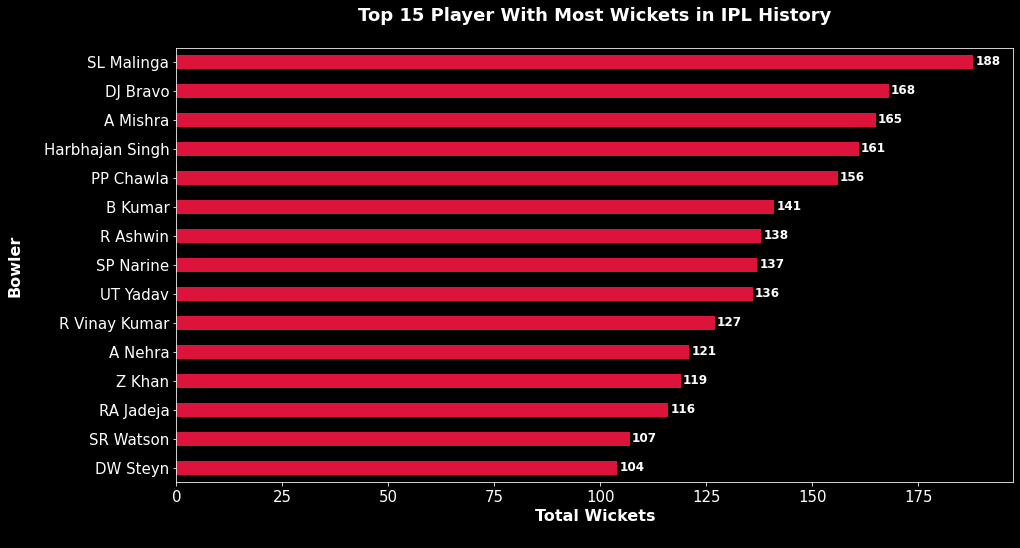

In [258]:
top15_wicket_takers = top15_wicket_takers.plot(kind ='barh',figsize=(15,8), color='crimson', fontsize=15)
plt.style.use('dark_background')

top15_wicket_takers.set_title('Top 15 Player With Most Wickets in IPL History\n', fontsize=18,fontweight = 'bold')

top15_wicket_takers.set_xlabel('Total Wickets\n', fontsize=16, fontweight = 'bold')
top15_wicket_takers.set_ylabel('Bowler\n', fontsize=16, fontweight = 'bold')

top15_wicket_takers.invert_yaxis()

for i in top15_wicket_takers.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    top15_wicket_takers.text(i.get_width()+0.5, i.get_y()+.35, i.get_width(),fontsize=12, fontweight = 'bold', color='white')

**Lasith Malinga has taken most number of wickets(188) in the history of IPL, followed by Dwayane Bravo(168) and Amit Mishra(165)**

<h2><center>******</center></h2>

## Most Extra Runs Conceded by Players:

In [259]:
extra_runs = deliveries.groupby('bowler')['extra_runs'].sum().sort_values(ascending = False)[0:10]
extra_runs

bowler
SL Malinga         293
P Kumar            236
UT Yadav           219
DJ Bravo           201
B Kumar            197
I Sharma           194
RP Singh           181
DW Steyn           171
SR Watson          171
Harbhajan Singh    170
Name: extra_runs, dtype: int64

### Plotting players conceding most extra runs

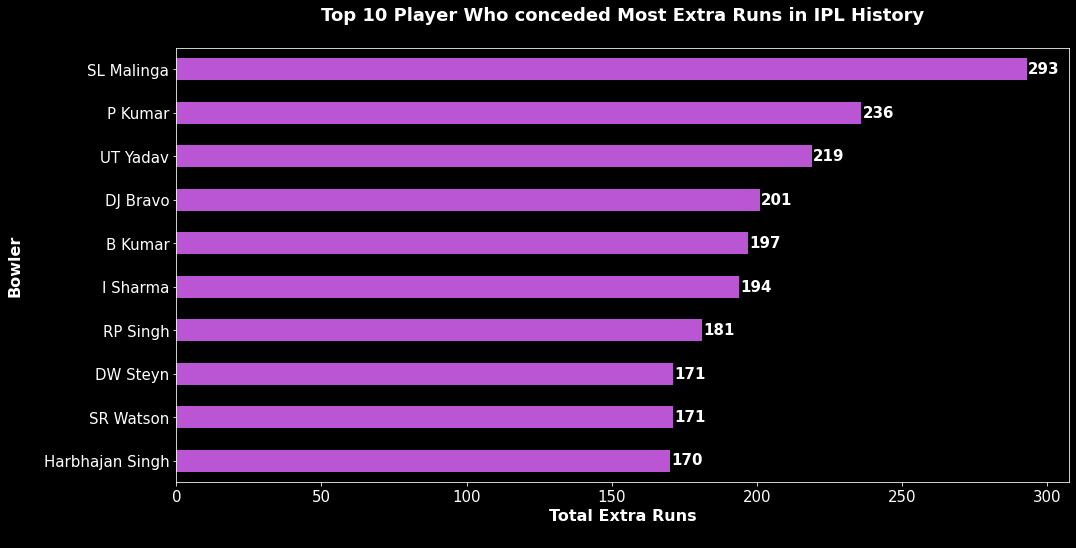

In [260]:
extra_runs = extra_runs.plot(kind ='barh',figsize=(16,8), color='mediumorchid', fontsize=15)
plt.style.use('dark_background')

extra_runs.set_title('Top 10 Player Who conceded Most Extra Runs in IPL History\n', fontsize=18,fontweight = 'bold')

extra_runs.set_xlabel('Total Extra Runs\n', fontsize=16, fontweight = 'bold')
extra_runs.set_ylabel('Bowler\n', fontsize=16, fontweight = 'bold')

extra_runs.invert_yaxis()

for i in extra_runs.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    extra_runs.text(i.get_width()+0.5, i.get_y()+.35, i.get_width(),fontsize=15, fontweight = 'bold', color='white')

**SL Malinga has conceded most extra runs in the history of the IPL**

<h2><center>******</center></h2>

## Which Bowler dismissed which Batsman the Most

In [261]:
bowl_bat = deliveries.groupby('bowler')['player_dismissed'].value_counts().sort_values(ascending = False)[0:15]
bowl_bat

bowler         player_dismissed
Z Khan         MS Dhoni            7
PP Ojha        MS Dhoni            7
SP Narine      RG Sharma           6
B Kumar        PA Patel            6
               AM Rahane           6
R Ashwin       RV Uthappa          6
A Mishra       RG Sharma           6
PP Chawla      AT Rayudu           6
Z Khan         G Gambhir           6
R Vinay Kumar  RG Sharma           6
A Nehra        V Kohli             6
MM Sharma      AT Rayudu           6
RA Jadeja      SR Watson           5
               SPD Smith           5
Imran Tahir    Ishan Kishan        5
Name: player_dismissed, dtype: int64

### Plotting the bowlers who dismissed the particular batsmans the most

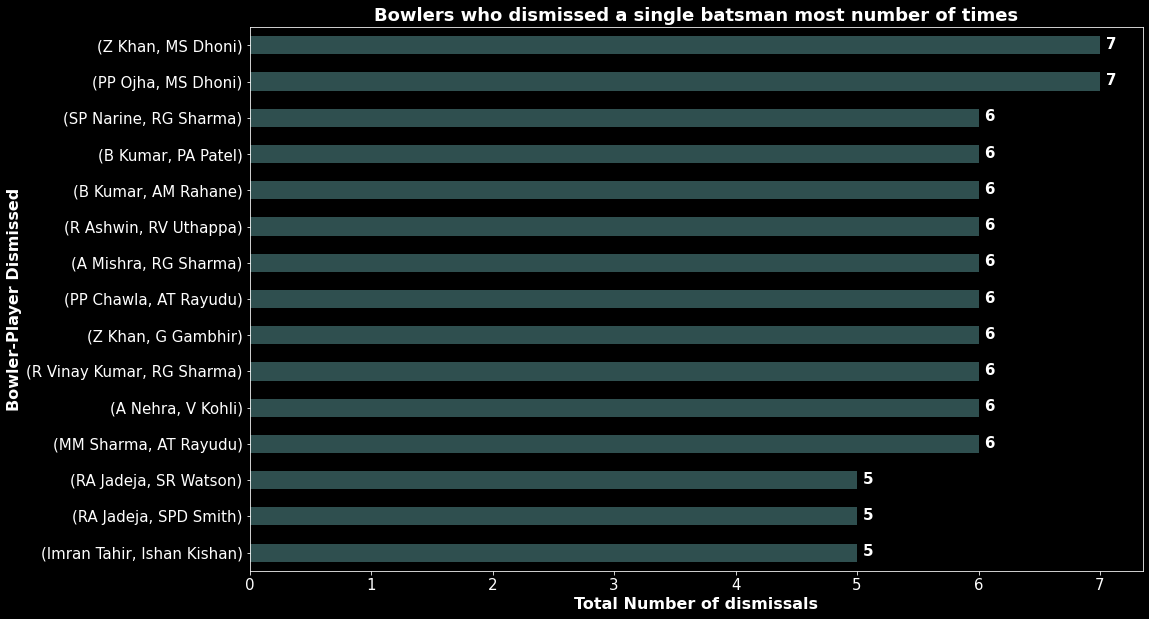

In [262]:
bowl_bat = bowl_bat.plot(kind ='barh',figsize=(16,10), color='darkslategrey', fontsize=15)
plt.style.use('dark_background')

bowl_bat.set_title('Bowlers who dismissed a single batsman most number of times', fontsize=18,fontweight = 'bold')

bowl_bat.set_xlabel('Total Number of dismissals', fontsize=16, fontweight = 'bold')
bowl_bat.set_ylabel('Bowler-Player Dismissed', fontsize=16, fontweight = 'bold')

bowl_bat.invert_yaxis()

for i in bowl_bat.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    bowl_bat.text(i.get_width()+.05, i.get_y()+.35, i.get_width(),fontsize=15, fontweight = 'bold', color='white')

**From the above analysis, it can be seen that MS Dhoni was not comfortable enough while facing Zaheer Khan and Pragyan Ojha as they have dismissed him most number of times**

<h2><center>******</center></h2>

## Players who got dismissed Most number of times

In [263]:
got_dismissed = deliveries['player_dismissed'].value_counts()[:10]
got_dismissed

SK Raina      162
RG Sharma     155
RV Uthappa    153
V Kohli       143
S Dhawan      137
G Gambhir     136
KD Karthik    135
PA Patel      126
AM Rahane     116
AT Rayudu     115
Name: player_dismissed, dtype: int64

### Plotting the players who got dismissed the most number of times

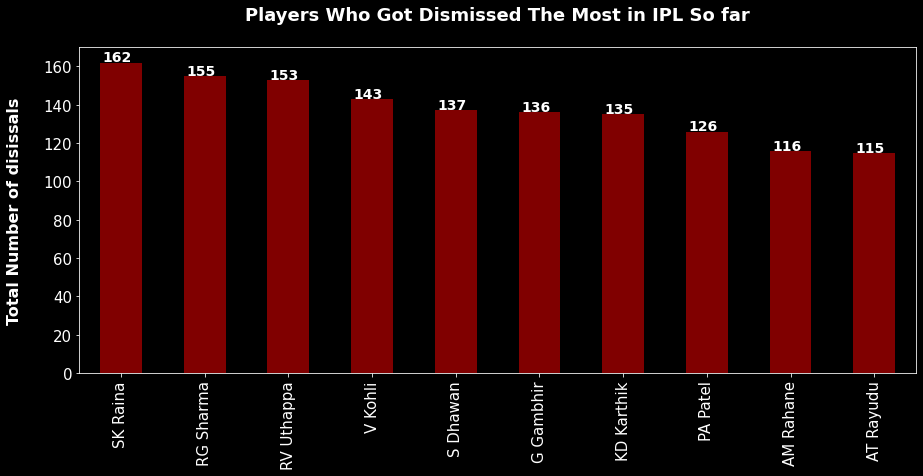

In [264]:
got_dismissed = got_dismissed.plot(kind ='bar',figsize=(15,6), color='maroon', fontsize=15)
plt.style.use('dark_background')

got_dismissed.set_title('Players Who Got Dismissed The Most in IPL So far\n', fontsize=18,fontweight = 'bold')

got_dismissed.set_ylabel('Total Number of disissals\n', fontsize=16, fontweight = 'bold')



for i in got_dismissed.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    got_dismissed.text(i.get_x()+.03,i.get_height()+.60,i.get_height(),fontsize=14,fontweight='bold',color='white')

**Suresh Raina has been dismissed the most number of times(162) followed by Rohit Sharma(155) and Robin Uthappa(153)**

<h2><center>******</center></h2>

## Top 10 Bowlers by Dot Balls

In [265]:
most_dot_by_bowler = deliveries.bowler[deliveries.total_runs==0].value_counts()[:10]
most_dot_by_bowler

Harbhajan Singh    1244
SL Malinga         1144
B Kumar            1116
A Mishra           1108
PP Chawla          1100
P Kumar            1075
R Ashwin           1067
SP Narine          1038
DW Steyn            996
UT Yadav            942
Name: bowler, dtype: int64

### Plotting bowlers with most number of dot balls

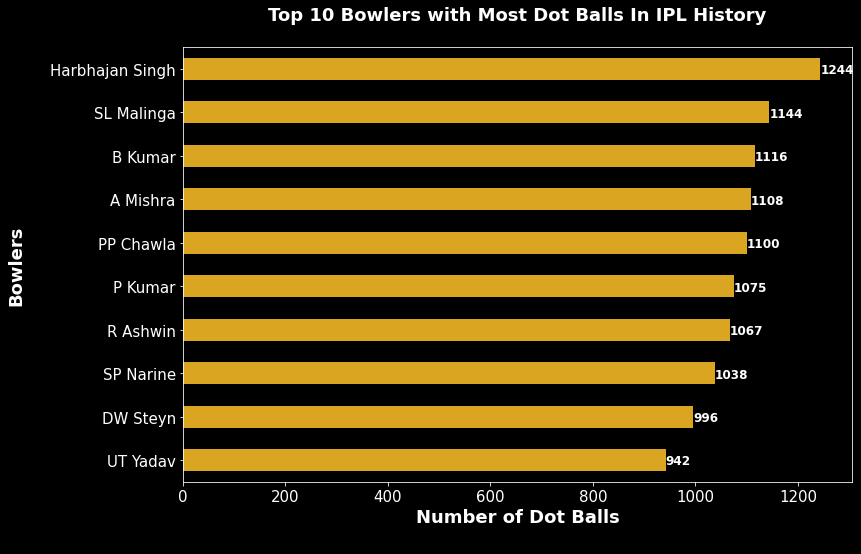

In [266]:
most_dot_by_bowler = most_dot_by_bowler.plot(kind ='barh',figsize=(12,8), color='goldenrod', fontsize=15)
plt.style.use('dark_background')

most_dot_by_bowler.set_title('Top 10 Bowlers with Most Dot Balls In IPL History\n', fontsize=18,fontweight = 'bold')

most_dot_by_bowler.set_xlabel('Number of Dot Balls\n', fontsize=18, fontweight = 'bold')
most_dot_by_bowler.set_ylabel('Bowlers\n', fontsize=18, fontweight = 'bold')

most_dot_by_bowler.invert_yaxis()

for i in most_dot_by_bowler.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    most_dot_by_bowler.text(i.get_width()+.05, i.get_y()+.35, i.get_width(),fontsize=12, fontweight = 'bold', color='white')

**Harbhajan Singh has the most number of dot balls(1244 balls) in the history of IPL. We can see 4 out of Top 5 most dot balls bowlers are spinners, so it can be concluded that spinners have more no of dot balls in comparison to pace bowlers**

<h2><center>******</center></h2>

## Top 10 Players Involved in Most Dismissals

In [267]:
most_dismissal_by_player = deliveries['fielder'].value_counts()[:10]
most_dismissal_by_player

MS Dhoni          159
KD Karthik        152
RV Uthappa        125
SK Raina          115
AB de Villiers    114
PA Patel           97
RG Sharma          92
V Kohli            90
KA Pollard         85
WP Saha            82
Name: fielder, dtype: int64

### Plotting players involved in most dismissals

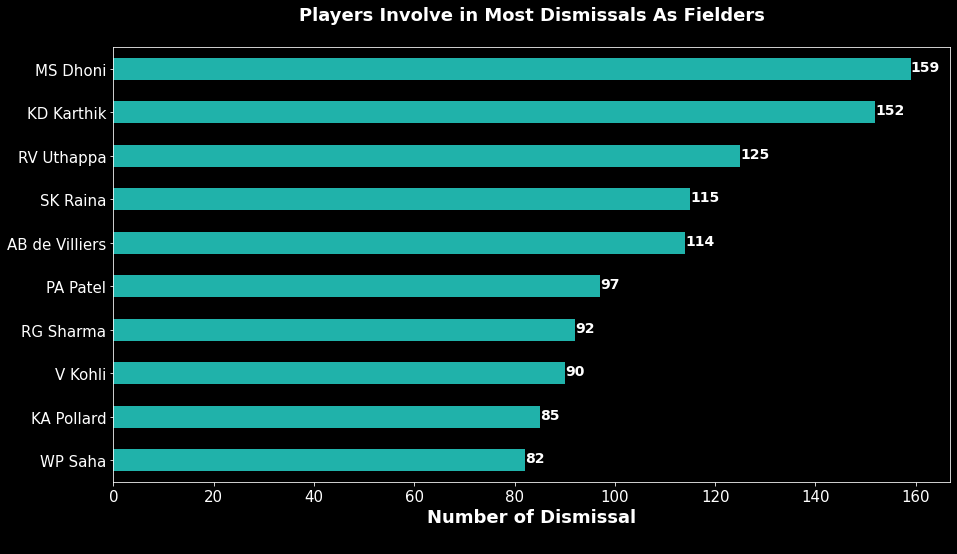

In [268]:
most_dismissal_by_player = most_dismissal_by_player.plot(kind ='barh',figsize=(15,8), color='lightseagreen', fontsize=15)
plt.style.use('dark_background')

most_dismissal_by_player.set_title('Players Involve in Most Dismissals As Fielders\n', fontsize=18,fontweight = 'bold')

most_dismissal_by_player.set_xlabel('Number of Dismissal\n', fontsize=18, fontweight = 'bold')

most_dismissal_by_player.invert_yaxis()

for i in most_dismissal_by_player.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    most_dismissal_by_player.text(i.get_width()+.05, i.get_y()+.30, i.get_width(),fontsize=14, fontweight = 'bold', color='white')

**MS Dhoni is involved in most number of dismissals(159) followed by Dinesh Karthik(152) and Robin Uthappa(125)**

<h2><center>******</center></h2>

## Dismissal Type:

In [269]:
dismissal_type = deliveries['dismissal_kind'].value_counts()
dismissal_type

caught                   5348
bowled                   1581
run out                   852
lbw                       540
stumped                   278
caught and bowled         211
retired hurt               12
hit wicket                 10
obstructing the field       2
Name: dismissal_kind, dtype: int64

### Plotting dismissal type

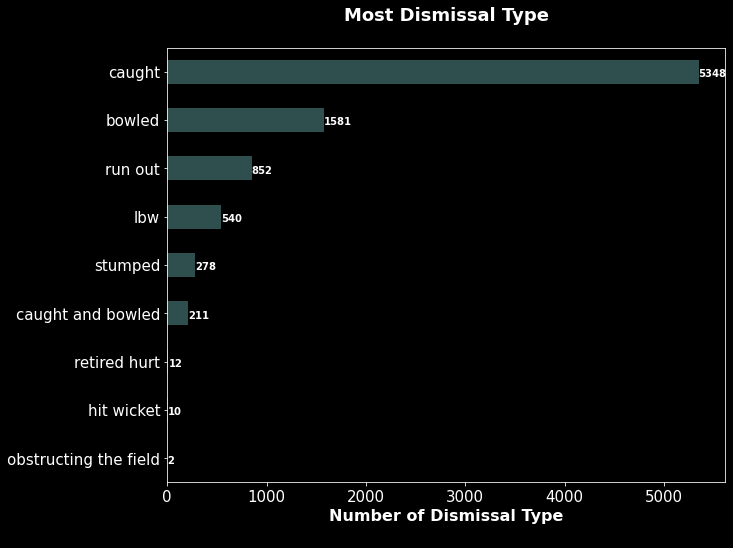

In [270]:
dismissal_type = dismissal_type.plot(kind ='barh',figsize=(10,8), color='darkslategrey', fontsize=15)

dismissal_type.set_title('Most Dismissal Type\n', fontsize=18,fontweight = 'bold')

dismissal_type.set_xlabel('Number of Dismissal Type\n', fontsize=16, fontweight = 'bold')

dismissal_type.invert_yaxis()

for i in dismissal_type.patches:
    
    # Fixing the width of the mark labels ( get_width pulls the mark label left or right & get_y pushes up or down)
    dismissal_type.text(i.get_width()+.05, i.get_y()+.35, i.get_width(),fontsize=10, fontweight = 'bold', color='white')

**Most common way of getting dismissed is by the means of catch(5348 times) and least common means of dismissal is obstructing the field(2 times)**

<h2><center>******</center></h2>

## Super Over:

In [271]:
super_over = deliveries['is_super_over'].value_counts()
super_over

0    178997
1        81
Name: is_super_over, dtype: int64

#### Replacing  '1' with 'Yes' and '0' with 'No' For Better Analysis

In [272]:
super_over  = deliveries['is_super_over'].replace(to_replace=1, value='Yes', inplace=True)
super_over = deliveries['is_super_over'].replace(to_replace=0, value='No', inplace=True)

In [273]:
super_over = deliveries['is_super_over'].value_counts()
super_over

No     178997
Yes        81
Name: is_super_over, dtype: int64

### Plotting number of times the result of the match was decided in super over

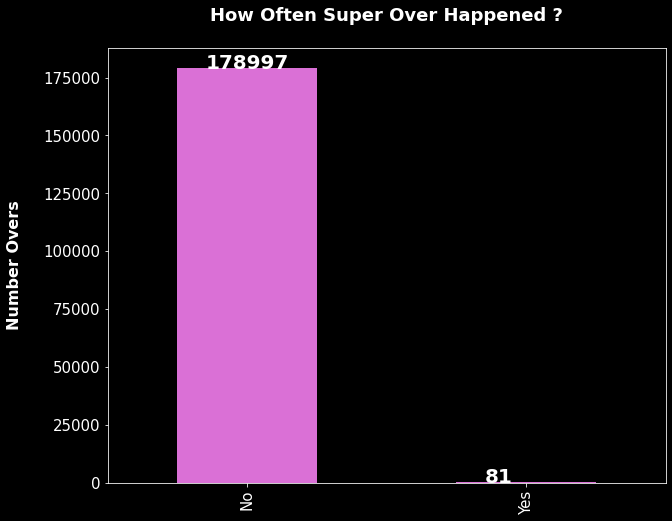

In [274]:
super_over = super_over.plot(kind ='bar',figsize=(10,8), color='orchid', fontsize=15)
plt.style.use('dark_background')

super_over.set_title('How Often Super Over Happened ?\n', fontsize=18,fontweight = 'bold')

super_over.set_ylabel('Number Overs\n', fontsize=16, fontweight = 'bold')

for i in super_over.patches:
    # Fixing the width of the mark labels ( get_height pushes the mark label up or down & get_x pulls left or right)
    
    super_over.text(i.get_x()+.10, i.get_height()+.01,(i.get_height()),fontsize=20,fontweight='bold', color='white')

## Analysis of Deleveries Dataset - Key Insights:

- Top 15 Players in the Most Runs Category are dominated by the Indians and Virat Kohli is on the Top with 5434 Runs followed by Suresh Raina(With 5415 Runs)and Rohit Sharma(With 4914 Runs).

- From Top 3 Players(Run Wise) Analysis we can infer that Suresh Raina is the Most Consistent Player than Virat Kohli and Rohit Sharma.

- Lasith Malinga has taken most number of wickets(188) in the history of IPL followed by Dwayne Bravo(168) and Amit Mishra(165).

- Harbhajan Singh bowled the most deliveries in IPL history while Virat Kohli faced most deliveries as a Batsman.

- Harbhajan Singh holds the record for most dot balls in IPL so far.

- Lasith Malinga conceded Most Extra Runs in IPL so far.

- Most common dismissal type is Catch in the IPL so far and the least common type is "Obstructing The Field" by which only 2 players got dismissed.

- There are 81 Super Overs bowled so far in the history of the IPL.

<h2><center>******</center></h2>

# Answers to Problem Statements:

## 1. Find out the most successful teams, players and factors contributing win or loss of a team.

- **Most Successful Teams**
    - Most successful team in terms of title wins is Mumbai Indians(4 titles) followed by Chennai Super Kings(3 titles).
    - Most successful team in terms of most matches wins is Mumbai Indians followed by Chennai Super Kings.
    - Mumbai Indians is the Most Successful Team while Defending the Target.
    - Kolkata Knight Riders is the Most Successful Team while Chasing The Target.

- **Most Successful Players**
    - **Batsman**
        - Virat Kohli is the most successful batsman in terms of top scorer of IPL, followed by Suresh Raina and Rohit Sharma.
        - Suresh Raina is the most successful batsman in terms of consistency.
    - **Bowler**
        - Lasith Malinga is the most successful bowler in terms of top wicket takers of IPL, followed by Dwayne Bravo and Amit Mishra.
        - Harbhajan Singh is the most successful bowler in terms of most dot balls bowled in the history of IPL.
 
- **Factors contributing win or loss of a team**
    - Toss is an important factor contributing to the win and loss of team.
    - From The Toss Analysis we can infer that the Top 3 Most Successful Teams also Won Maximum Number of Tosses and the Teams who Won the Toss Preffered to Field First 61.2% Times.
    

## 2. Suggest teams or players a company should endorse for its products.

- **Teams the company should endorse**
    - **A company will always look to endorse a team that is more successful and consistent as those teams will be more popular and will make the company a good profit.**
    - **Teams that can be endorsed:**
        - Mumbai Indians
        - Chennai Super Kings
        - Kolkata Knight Riders

- **Players the comapny should endorse** 
    - **A company will always look to endorse more successful and popular players that can make them a good profit.**
    - **Players that can be endorsed:**
        - Suresh Raina
        - Virat Kohli
        - MS Dhoni
        - Lasith Malinga
        - Harbhajan Singh
        - Rohit Sharma
        - Dwayne Bravo
